In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_theme()
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from statannot import add_stat_annotation
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
Ns = [1, 2, 4, 8, 16]
Ms = list(range(1,7))
cif_names = ["7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
cif_names.reverse()
mapper_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/35_cif_combos/data/7mhf.csv"), index_col=0)
pdb_r_free_dict = {"7mhf": .224, "7mhg": .205, "7mhh": .253, "7mhi": .228, "7mhj": .240, "7mhk": .247}

exp_name = "181_wxray_control"
analysis_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf", exp_name)

summary_df = pd.read_csv(Path(analysis_dir, "summary.csv"), index_col=0)
summary_df.head()


,r_free,ff,pdb,w_0,cif_name,N,job_id,M,cifs,w_1,...,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15
1,0.314793,862.225940,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,0,1,7mhf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,0.318000,817.147054,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,0,2,7mhf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,0.326474,3085.527126,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,0,3,7mhf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,0.329944,3546.284195,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,0,4,7mhf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,0.329416,3758.926269,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,0,5,7mhf,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


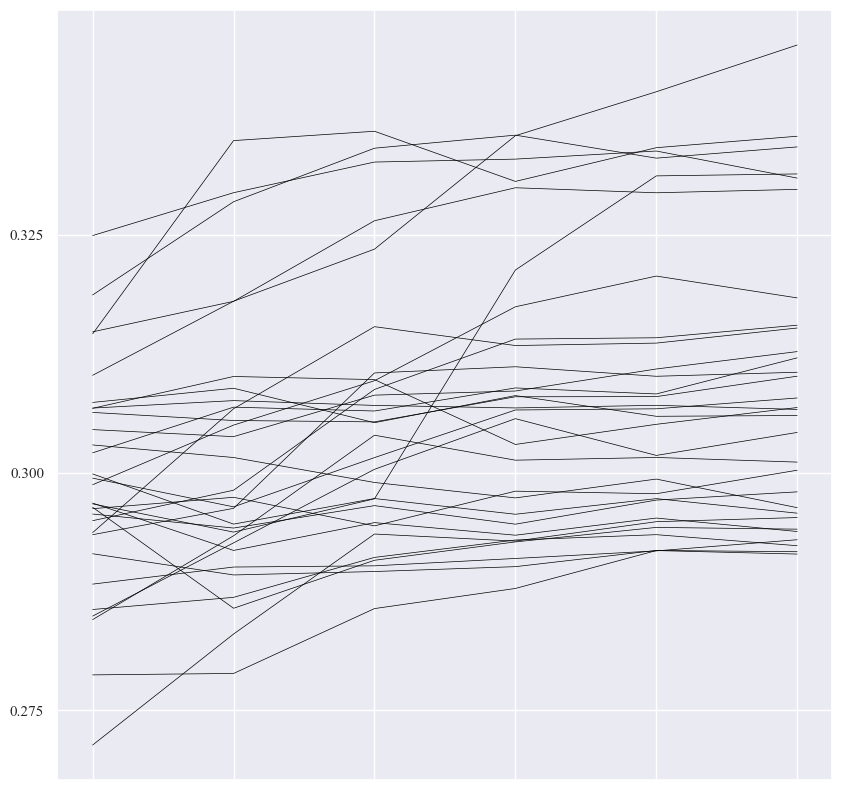

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for N in Ns:
    for cif_name in cif_names:
        subset_df = summary_df[(summary_df["N"] == N) & (summary_df["cif_name"] == cif_name)]
        plt.plot(subset_df["M"], subset_df["r_free"], c="black", linewidth=0.5)
        # plt.scatter(subset_df["M"], subset_df["r_free"], c="black", s=5, marker="x")

ax.locator_params(axis='y', nbins=3)
# ax.tick_params(left=False, labelleft=False)
ax.tick_params(bottom=False, labelbottom=False)

plt.savefig(Path(Path.home(), "Desktop/fig.png"))

